In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np

import sys

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, mean_absolute_percentage_error, mean_absolute_error, f1_score
import sklearn

import json

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
classification_datasets = ["breast_cancer", "compas", "diabetes", "income", "iris", "mushroom", "nursery"]
regression_datasets = ["bike_sharing", "facebook", "housing", "real_estate", "solar_flare", 
                       "student_scores", "wine_quality"]
datasets = []
datasets.extend(classification_datasets)
datasets.extend(regression_datasets)

data_names = {"breast_cancer":"Breast Cancer", "compas": "COMPAS", "diabetes":"Diabetes", 
              "income": "Adult Income", "iris": "Iris", "mushroom": "Mushroom", "nursery": "Nursery",#}
              "bike_sharing": "Bike Rentals", "facebook": "Facebook Metrics", "housing" : "House Prices", "real_estate" : "Real Estate",
              "solar_flare": "Solar Flare", "student_scores": "Student Scores", "wine_quality": "Wine Quality"}

PATH = os.getcwd()

In [4]:
for data in classification_datasets:
    print(data_names[data])
    X_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtrain.csv"), index_col=False, sep = ";")#.values
    y_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_ytrain.csv"), index_col=False, sep = ";")#.values
    
    with open(os.path.join(PATH, data, "datasets", "col_dict.json")) as f:
        col_dict = json.load(f)
        
    if col_dict["continuous"] == None:
        disc_prop = 1.0
        disc_num = len(col_dict["discrete"])
    elif col_dict["discrete"] == None:
        disc_prop = 0.0
        disc_num = 0
    else:
        disc_num = len(col_dict["discrete"])
        total = X_train.shape[1]
        disc_prop = disc_num/total
    
    print("Num variables:\t", X_train.shape[1])
    print("Num training instances:\t", X_train.shape[0])
    print("Ratio of variables to instances:\t", X_train.shape[0]/X_train.shape[1])
    print("Percentage discrete variables:\t", round(disc_prop, 4))
    print("Num discrete variables:\t", disc_num)
    
    print(y_train.value_counts(normalize=True)*100)
    print("----------------------------------------------------------------------------")

Breast Cancer
Num variables:	 30
Num training instances:	 296
Ratio of variables to instances:	 9.866666666666667
Percentage discrete variables:	 0.0
Num discrete variables:	 0
diagnosis
1            51.013514
0            48.986486
dtype: float64
----------------------------------------------------------------------------
COMPAS
Num variables:	 20
Num training instances:	 2793
Ratio of variables to instances:	 139.65
Percentage discrete variables:	 0.8
Num discrete variables:	 16
high_risk
0            50.125313
1            49.874687
dtype: float64
----------------------------------------------------------------------------
Diabetes
Num variables:	 8
Num training instances:	 375
Ratio of variables to instances:	 46.875
Percentage discrete variables:	 0.0
Num discrete variables:	 0
Outcome
1          50.4
0          49.6
dtype: float64
----------------------------------------------------------------------------
Adult Income
Num variables:	 104
Num training instances:	 10977
Ratio of v

Bike Rentals
Num variables:	 61
Num training instances:	 12165
Ratio of variables to instances:	 199.4262295081967
Percentage discrete variables:	 0.9344
Num discrete variables:	 57


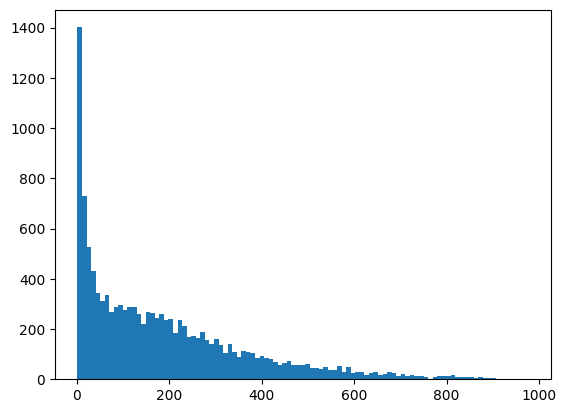

----------------------------------------------------------------------------
Facebook Metrics
Num variables:	 49
Num training instances:	 349
Ratio of variables to instances:	 7.122448979591836
Percentage discrete variables:	 1.0
Num discrete variables:	 49


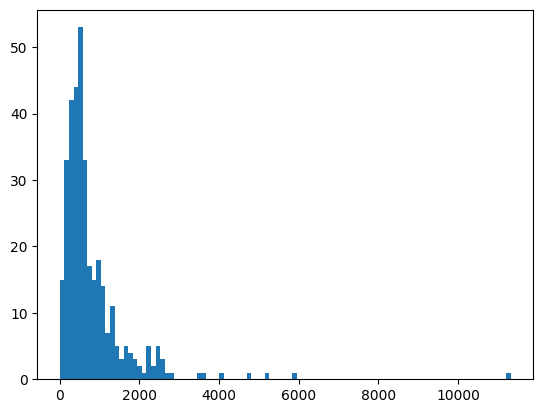

----------------------------------------------------------------------------
House Prices
Num variables:	 22
Num training instances:	 354
Ratio of variables to instances:	 16.09090909090909
Percentage discrete variables:	 0.5
Num discrete variables:	 11


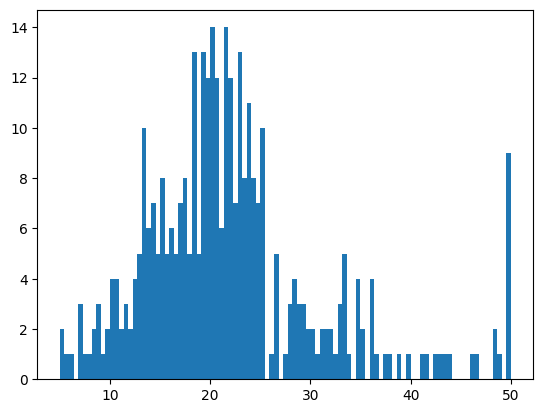

----------------------------------------------------------------------------
Real Estate
Num variables:	 6
Num training instances:	 289
Ratio of variables to instances:	 48.166666666666664
Percentage discrete variables:	 0.0
Num discrete variables:	 0


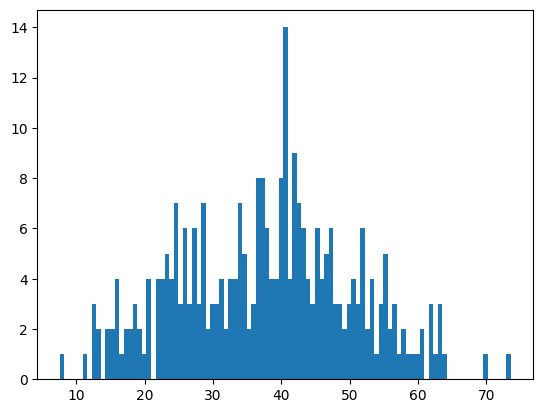

----------------------------------------------------------------------------
Solar Flare
Num variables:	 32
Num training instances:	 972
Ratio of variables to instances:	 30.375
Percentage discrete variables:	 1.0
Num discrete variables:	 32


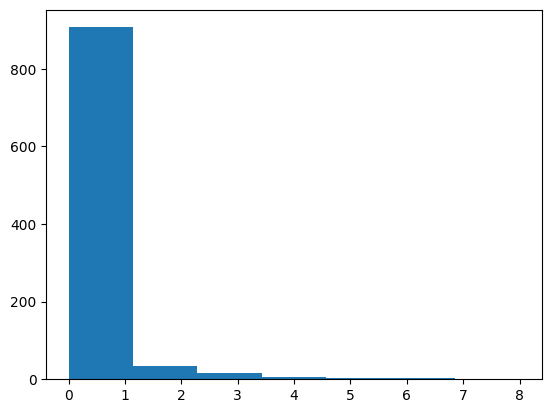

----------------------------------------------------------------------------
Student Scores
Num variables:	 58
Num training instances:	 454
Ratio of variables to instances:	 7.827586206896552
Percentage discrete variables:	 0.7414
Num discrete variables:	 43


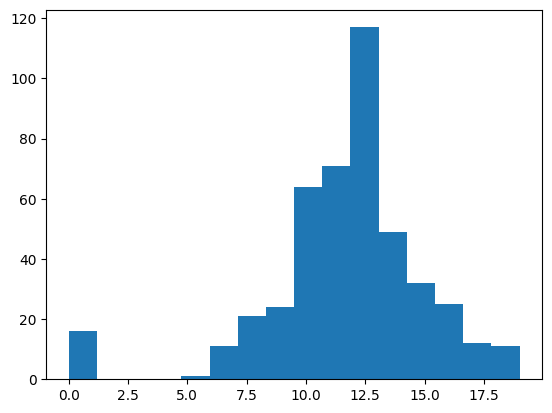

----------------------------------------------------------------------------
Wine Quality
Num variables:	 11
Num training instances:	 3428
Ratio of variables to instances:	 311.6363636363636
Percentage discrete variables:	 0.0
Num discrete variables:	 0


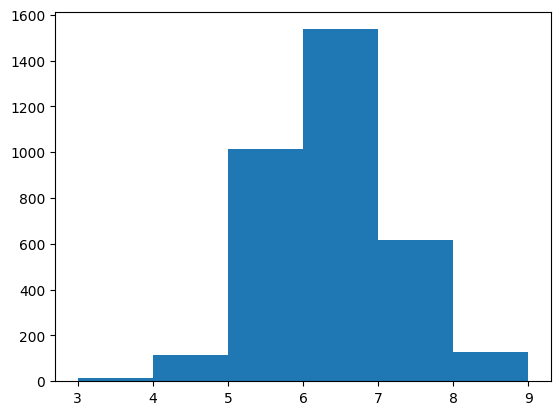

----------------------------------------------------------------------------


In [5]:
for data in regression_datasets:
    print(data_names[data])
    X_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_Xtrain.csv"), index_col=False, sep = ";")#.values
    y_train = pd.read_csv(os.path.join(PATH, data, "datasets", data+"_ytrain.csv"), index_col=False, sep = ";")#.values
      
    with open(os.path.join(PATH, data, "datasets", "col_dict.json")) as f:
        col_dict = json.load(f)
        #print(col_dict)
        #print(type(col_dict))
        
    if col_dict["continuous"] == None:
        disc_prop = 1.0
        disc_num = len(col_dict["discrete"])
    elif col_dict["discrete"] == None:
        disc_prop = 0.0
        disc_num = 0
    else:
        disc_num = len(col_dict["discrete"])
        total = X_train.shape[1]
        disc_prop = disc_num/total
    
    print("Num variables:\t", X_train.shape[1])
    print("Num training instances:\t", X_train.shape[0])
    print("Ratio of variables to instances:\t", X_train.shape[0]/X_train.shape[1])
    print("Percentage discrete variables:\t", round(disc_prop, 4))
    print("Num discrete variables:\t", disc_num)
    
    #print(y_train.value_counts(normalize=True)*100)
    #print(y_train.max()[0])
    #print(y_train.min()[0])
    
    min_val = y_train.min()[0]
    max_val = y_train.max()[0]
    
    num_unique = len(np.unique(y_train.values.reshape(len(y_train))))
    
    if num_unique - min_val <=40:
        num_bins = num_unique
    elif num_unique > 40 and num_unique <= 100:
        num_bins = 10
    else:
        num_bins = 100
        
    #print(num_unique, num_bins)
    
    bins = np.linspace(min_val, max_val, num_bins)
    plt.hist(y_train, bins)
    plt.show()
    print("----------------------------------------------------------------------------")